# Collagen Protein Visualisation With Biopython

# Table of contents:<br>
1. [Attributes of Biopython](#1.-Attributes-of-Biopython)
2. [Understand FASTA file format](#2.-Understanding-FASTA-file-format)
3. [Sequence manipulation using Biopython](#3.-Sequence-manipulation-using-Biopython)
4. [Transcription & Translation studies](#4.-Transcription-&-Translation-Studies)
5. [Perform Basic Local Alignment using NCBI-BLAST](#5.-Basic-Local-Alignment-Using-NCBI-BLAST)
6. [Reading PDB file](#6.-Reading-PDB-file)
7. [Visualizing Collagen Protein structure](#7.-Visualizing-Collagen-Protein-structure)

## Biopython

<div class="alert alert-block alert-info" style="Font-size:16px">
    
- Set of **tools** for **Biological computation**<br>
- Written in **Python**<br>
- Distributed **collaborative effort** to develop Python libraries and applications<br>
- Address the needs of current and future work in **Bioinformatics**<br>
    
</div>

### Applications

<div class="alert alert-block alert-success" style="Font-size:15px">
    
1. **Sequence Analysis** (DNA/RNA/Protein)<br>
2. **Transcription** & **Translation studies**<br>
3. Accessing **Bioinformatics Databases**<br>
a. NCBI<br>
b. PDB<br>

4. **3D Structure** Analysis
</div>

## MODULES

In [11]:
!pip install biopython
!pip install nglview

import Bio
import pylab
import urllib
import pandas as pd
import nglview as nv
from Bio.Seq import Seq
from Bio.Blast import NCBIWWW
from collections import Counter
from Bio.Data import CodonTable
from Bio import SeqIO, SearchIO
from Bio.PDB import PDBParser, MMCIFParser
from Bio.SeqUtils import molecular_weight, gc_fraction

## 1. Attributes of Biopython

In [13]:
# Check Attributes of Biopython
dir(Bio)

['Align',
 'BiopythonDeprecationWarning',
 'BiopythonExperimentalWarning',
 'BiopythonParserWarning',
 'BiopythonWarning',
 'Blast',
 'Data',
 'File',
 'GenBank',
 'MissingExternalDependencyError',
 'MissingPythonDependencyError',
 'PDB',
 'SVDSuperimposer',
 'SearchIO',
 'Seq',
 'SeqFeature',
 'SeqIO',
 'SeqRecord',
 'SeqUtils',
 'Sequencing',
 'StreamModeError',
 'SwissProt',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_parent_dir',
 '_utils',
 'os',
 'warnings']

## 2. Understanding FASTA file format

#### SEQUENCE SOURCE

<a href="https://www.ncbi.nlm.nih.gov/nuccore/MN908947.3?report=fasta"> **COLLAGEN SEQUENCE FROM NCBI**<a>

### 2.1. FASTA Format

### 2.2. Reading from file

In [17]:
from Bio import SeqIO, SearchIO
# Loading FASTA file
seq_file_read = SeqIO.read("C:/Users/nirmi/HIV2.fna", "fasta")
# seq_file_parse = SeqIO.parse("sequence.fasta", "fasta")

In [18]:
type(seq_file_read)#,type(seq_file_parse)

Bio.SeqRecord.SeqRecord

### 2.3 Sequence details

In [20]:
# list sequence details
seq_file_read.id

'KP890355.1'

In [21]:
seqfromfile = seq_file_read.seq

In [22]:
# List sequence details from the FASTA file
for record in SeqIO.parse("C:/Users/nirmi/HIV2.fna", "fasta"):
    print(record)


ID: KP890355.1
Name: KP890355.1
Description: KP890355.1 HIV-2 isolate NWK08 from USA, complete genome
Number of features: 0
Seq('GCTACCAGGTAGAGCCCCGAGTGGATCCCTGGTAGCACTAGCAGGTGAGCCTGG...CCA')


In [23]:
print(record.id)

KP890355.1


In [24]:
# store sequence for later analysis
seqfromfile = record.seq
seqfromfile

Seq('GCTACCAGGTAGAGCCCCGAGTGGATCCCTGGTAGCACTAGCAGGTGAGCCTGG...CCA')

In [25]:
# length of sequence
len(seqfromfile)

9480

In [26]:
from Bio.SeqUtils import molecular_weight

# Load your sequence from a FASTA file
fasta_path = "C:/Users/nirmi/HIV2.fna"
record = SeqIO.read(fasta_path, format="fasta")

# Calculate molecular weight 
mol_weight = molecular_weight(record.seq)
print(f"Molecular Weight: {mol_weight} Da")


Molecular Weight: 2944530.0546 Da


## 3. Sequence manipulation using Biopython

<div class="alert alert-block alert-warning" style="Font-size:16px">
- indexing/slicing<br>
- concatination<br>
- codon search<br>
- GC content<br>
- complement<br>

</div>

### 3.1. Indexing / Slicing

In [41]:
# CODON
seqfromfile[0:3]

Seq('GCT')

### 3.2. Concatination

In [44]:
seqfromfile[0:3]+seqfromfile[-3:]

Seq('GCTCCA')

In [46]:
concat = seqfromfile[:6]+seqfromfile[-5:]
concat

Seq('GCTACCTACCA')

### 3.3. Codon Search

In [49]:
seqfromfile.find('AGA')

10

### 3.4. GC Content

In [52]:
# LOGIC
(seqfromfile.count('G') + seqfromfile.count('C'))/(len(seqfromfile)) * 100

44.324894514767934

In [54]:
from Bio.SeqUtils import gc_fraction
from Bio import SeqIO

# Load the sequence from file
seq_file_read = SeqIO.read("C:/Users/nirmi/HIV2.fna", "fasta")

# Calculate GC content
gc_content = gc_fraction(seq_file_read.seq) * 100  # Convert fraction to percentage

print(f"GC content: {gc_content}%")


GC content: 44.324894514767934%


### 3.5. Complement

<div class="alert alert-block alert-info" style="Font-size:16px">

In **DNA** <br>
    **A** Bonds with **T** (DOUBLE BOND)<br>
    **G** Bonds with **C** (TRIPLE BOND)<br>
    
</div>

In [58]:
seqfromfile[0:6]

Seq('GCTACC')

In [60]:
#complement

seqfromfile[0:6].complement()

Seq('CGATGG')

In [62]:
#reverse complement

seqfromfile[0:6].reverse_complement()

Seq('GGTAGC')

## 4. Transcription & Translation Studies

<div class="alert alert-block alert-warning" style="font-size:16px">
DNA > RNA = Transcription
</div>
<div class="alert alert-block alert-warning" style="font-size:16px">
mRNA > amino acid (protein) = Translation
</div>

### 4.1. Transcription

In [66]:
#Transcribe

mRNA = seqfromfile.transcribe()
mRNA[:10]

Seq('GCUACCAGGU')

In [68]:
#Back transcribe

mRNA.back_transcribe()[:10]

Seq('GCTACCAGGT')

### 4.2. Translation

In [71]:
print(CodonTable.unambiguous_dna_by_id[1])

Table 1 Standard, SGC0

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA Stop| A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I   | ACT T   | AAT N   | AGT S   | T
A | ATC I   | ACC T   | AAC N   | AGC S   | C
A | ATA I   | ACA T   | AAA K   | AGA R   | A
A | ATG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V   | GCG A   | GAG E   | GGG G   | G
--+---------

In [73]:
protein_seq = seqfromfile.translate()
protein_seq[:10]

Seq('ATR*SPEWIP')

In [75]:
len(protein_seq)

3160

In [77]:
len(seqfromfile)

9480

In [79]:
print(CodonTable.unambiguous_dna_by_id[1])

Table 1 Standard, SGC0

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA Stop| A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I   | ACT T   | AAT N   | AGT S   | T
A | ATC I   | ACC T   | AAC N   | AGC S   | C
A | ATA I   | ACA T   | AAA K   | AGA R   | A
A | ATG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V   | GCG A   | GAG E   | GGG G   | G
--+---------

In [81]:
# Listing the most common amino acids

common_amino = Counter(protein_seq)
common_amino.most_common(10)

[('R', 297),
 ('S', 249),
 ('G', 228),
 ('L', 227),
 ('T', 218),
 ('K', 206),
 ('Q', 163),
 ('E', 159),
 ('I', 158),
 ('N', 151)]

In [83]:
del common_amino['*']

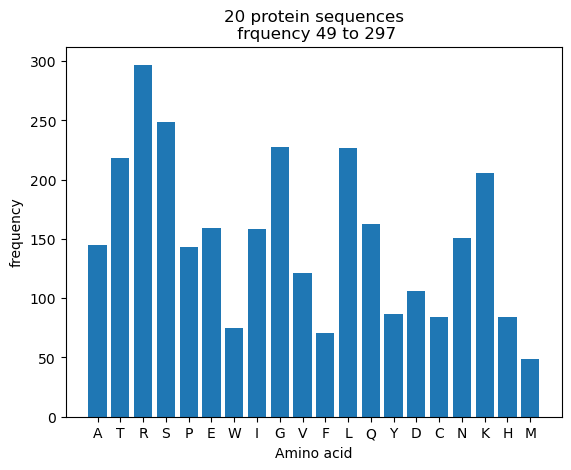

In [85]:
# visualize all 20 amino acid occurrences in the form of a histogram

pylab.bar(common_amino.keys(),common_amino.values())

pylab.title("%i protein sequences\n frquency %i to %i" 
            % (len(common_amino.values()), 
               min(common_amino.values()), 
               max(common_amino.values())))

pylab.xlabel("Amino acid")
pylab.ylabel("frequency")
pylab.show()

### Since stop codon * signifies end of a protein we can split the sequence using ( * )

In [88]:
protein_list = [str(i) for i in protein_seq.split('*')]
protein_list[:10]

['ATR',
 'SPEWIPGSTSR',
 'AWVFPVRLSLVLGQYQADGSTLACLTLNKAAI',
 'KQVSVCSHLF',
 'SPPGHSVSWLEVSVSSPWNCQNPLTKGQP',
 'VKNLWQFGARTGTRET',
 'ESTRLSEGSKGGRDQPRRRKTRCQRAERDVKVREAFGTDSPKVCVAIELFSYPQGG',
 'KYSGRWARDTPSCQGKKQMN',
 'KKLGYGPAERKSIC',
 'SI']

In [90]:
# convert sequences to dataframe
large_proteins = [x for x in protein_list if len(x)> 10]
df = pd.DataFrame({'protein_seq':large_proteins})

In [92]:
# Add a column with sequence lengths

df['length'] = df['protein_seq'].apply(len)
df.head()

,protein_seq,length
0,SPEWIPGSTSR,11
1,AWVFPVRLSLVLGQYQADGSTLACLTLNKAAI,32
2,SPPGHSVSWLEVSVSSPWNCQNPLTKGQP,29
3,VKNLWQFGARTGTRET,16
4,ESTRLSEGSKGGRDQPRRRKTRCQRAERDVKVREAFGTDSPKVCVA...,56


In [94]:
# sort sequence data

df.sort_values(by = ['length'], ascending = False)[:10]

,protein_seq,length
56,GSFTSCIRPVSMASPGLHLLIGILLLSVLQTWCGLYVTVFYGVPAW...,902
53,RLGRMDPRERAPPGNSGEETIGEAFEWLETTVTQINREAVNHLPRE...,115
54,MAAPPQEEAPQREPWDEWVIEVLEDIKQEALKHFDPRLLHALGNYI...,100
41,IWHPTASGKTNSKYMSQMSTKRRSNTWASRCISRDMADGLHSFRGK...,98
21,SIRKRNKSNINDWGDSNKYFRQKYITAIRNDFKLSIGKSRANTSTL...,90
63,QEEANHKVRWRTERKLAEIAGTFQQGDGQWVETGRGVWERPIIFCI...,63
4,ESTRLSEGSKGGRDQPRRRKTRCQRAERDVKVREAFGTDSPKVCVA...,56
16,EGNNRRGHQLLDALIVGNQATLPEIAGHQEERGAGNVERKDTCKQT...,54
33,RSQITGQCSTENRQGEPSNMGTITNISPTSRERNLGIMVDRLLASHVDT,49
36,NHQSTGRARSNKNGFRRLRRQSKYGHRLTVCHRYFIRTAYRIRI,44


In [96]:
# let's take a single protein from the table

one_large_protein = df.nlargest(1,'length')
single_prot = one_large_protein.iloc[0,0]
single_prot

'GSFTSCIRPVSMASPGLHLLIGILLLSVLQTWCGLYVTVFYGVPAWKNATVPLFCATKNRDTWGTTQCLPDNNDYVEIPLNVTEAFDAWNNTVTEQAIEDVWNLFETSIKPCVKLTPLCVAMRCNKTETEKWGLTNKQNTTNTTSTTTTSTPTTTKEKEIKGNETCINDNNCAGLETEPMIGCKFNMSGLKRDEEKEYNETWYSQDLVCDQNYNSTNISRCYMNHCNTSVIQESCDKHYWDSLRFRYCAPPGFALLRCNDTSYSGFQPNCSKVVASSCTRMMETQTSTWFGLNGTRAENRTYIYWHGRDNRTIISLNKYYNLTMRCRRPGNKTVRPITIMSGLVFHSQPINERPKQAWCWFEGEWKKAIQEVKDTLATHPRYTGTNDTKKINLVAPEGGDPEVTFMWTNCRGEFLYCKMNWFLNWVEDRNITHGRWSTQKPAEKQKRNYVPCHIRQIINTWHKVGKNVYLPPREGNLTCNSSVTSIIANIDWISDNETNITMSAEVAELYRLELGDYKLVEITPIGLAPTSVKRYSSATPRNKRGVFVLGFLGFLATAGSAMGAASLTLTAQSRTLLAGIVQQQQQLLDAVKRQQELLRLTVWGTKNLQTRVTAIEKYLKDQAQLNSWGCAFRQVCHTTVPWPNDTLQPNWDNMTWQEWERKVDFLTENITELLEQAQIQQEKNMYELQKLNSWDVFGNWFDLSSWITYIQYGVYLVVGVIGLRISIYIVQMLLRLREGYRPVFSSPPSYRQQIHIRRDQELPDGEDREEDGGEKGGNRSWPWQIEYIHFLIRQLIRLLTWLYSNCRDLIYRSFQTLHQLTQWILRRISAAATATRDFIRTEASYISYGWQYFLEALQAAMRAAGETLASAGGELWATLGRIGRGLLAVPRRIRQGLELALN'

In [98]:
# Define the filename
fasta_filename = "single_protein_sequence.fasta"

# Write the sequence in FASTA format
with open(fasta_filename, 'w') as file:
    # Write the header (starting with '>')
    file.write(">single_large_protein\n")
    
    # Write the sequence
    file.write(single_prot)

print(f"Protein sequence written to {fasta_filename} in FASTA format")


Protein sequence written to single_protein_sequence.fasta in FASTA format


## 5. Basic Local Alignment Using NCBI-BLAST

In [101]:
from Bio import SeqIO

# Provide the correct file path
file_path = "single_protein_sequence.fasta"

# Read the sequence from the FASTA file
read = SeqIO.read(file_path, "fasta")

# Print the sequence
print(read.seq)


GSFTSCIRPVSMASPGLHLLIGILLLSVLQTWCGLYVTVFYGVPAWKNATVPLFCATKNRDTWGTTQCLPDNNDYVEIPLNVTEAFDAWNNTVTEQAIEDVWNLFETSIKPCVKLTPLCVAMRCNKTETEKWGLTNKQNTTNTTSTTTTSTPTTTKEKEIKGNETCINDNNCAGLETEPMIGCKFNMSGLKRDEEKEYNETWYSQDLVCDQNYNSTNISRCYMNHCNTSVIQESCDKHYWDSLRFRYCAPPGFALLRCNDTSYSGFQPNCSKVVASSCTRMMETQTSTWFGLNGTRAENRTYIYWHGRDNRTIISLNKYYNLTMRCRRPGNKTVRPITIMSGLVFHSQPINERPKQAWCWFEGEWKKAIQEVKDTLATHPRYTGTNDTKKINLVAPEGGDPEVTFMWTNCRGEFLYCKMNWFLNWVEDRNITHGRWSTQKPAEKQKRNYVPCHIRQIINTWHKVGKNVYLPPREGNLTCNSSVTSIIANIDWISDNETNITMSAEVAELYRLELGDYKLVEITPIGLAPTSVKRYSSATPRNKRGVFVLGFLGFLATAGSAMGAASLTLTAQSRTLLAGIVQQQQQLLDAVKRQQELLRLTVWGTKNLQTRVTAIEKYLKDQAQLNSWGCAFRQVCHTTVPWPNDTLQPNWDNMTWQEWERKVDFLTENITELLEQAQIQQEKNMYELQKLNSWDVFGNWFDLSSWITYIQYGVYLVVGVIGLRISIYIVQMLLRLREGYRPVFSSPPSYRQQIHIRRDQELPDGEDREEDGGEKGGNRSWPWQIEYIHFLIRQLIRLLTWLYSNCRDLIYRSFQTLHQLTQWILRRISAAATATRDFIRTEASYISYGWQYFLEALQAAMRAAGETLASAGGELWATLGRIGRGLLAVPRRIRQGLELALN


In [130]:
%%time

# based on the server load this query might take 2-3 minutes to run

result_handle = NCBIWWW.qblast("blastp","pdb",read.seq)

blast_qresult = SearchIO.read(result_handle, "blast-xml")

CPU times: total: 0 ns
Wall time: 1min 4s


In [131]:
print(blast_qresult[0:5])

Program: blastp (2.16.0+)
  Query: unnamed (902)
         protein product
 Target: pdb
   Hits: ----  -----  ----------------------------------------------------------
            #  # HSP  ID + description
         ----  -----  ----------------------------------------------------------
            0      1  pdb|7T2P|A  Chain A, Envelope glycoprotein gp120 [Simia...
            1      1  pdb|8DUA|C  Chain C, Envelope glycoprotein gp120 [Simia...
            2      1  pdb|8DVD|E  Chain E, Envelope glycoprotein gp160 [Simia...
            3      2  pdb|6TYB|G  Chain G, Envelope glycoprotein gp160 [Simia...
            4      2  pdb|2BF1|A  Chain A, EXTERIOR MEMBRANE GLYCOPROTEIN GP1...


In [134]:
#fetch the id, description, evalue, bitscore & alignment of first hit

seqid = blast_qresult[0]

details = seqid[0]

print(f"\
Sequence ID:{seqid.id}\n\
description:{seqid.description}\n\
E value:    {details.evalue} \n\
Bit Score:  {details.bitscore}\n\
")

Sequence ID:pdb|7T2P|A
description:Chain A, Envelope glycoprotein gp120 [Simian immunodeficiency virus]
E value:    0.0 
Bit Score:  875.159



In [136]:
print(f"alignment:\n{details.aln}")

alignment:
Alignment with 2 rows and 527 columns
MASPGLHLLIGILLLSVLQTWCGLYVTVFYGVPAWKNATVPLFC...SSA unnamed
MGCLGNQLLIAILLLSVYGIYCTLYVTVFYGVPAWRNATIPLFC...TTG pdb|7T2P|A


## 6. Reading PDB file

### Retreiving PDB Structure From RCSB PDB

In [140]:
seqid.id

'pdb|7T2P|A'

In [142]:
# split seqid

seqid.id.split('|')[1]

'7T2P'

In [144]:
import urllib.request
import os

# Define the directory and file path
directory = "Sequence_data"
file_path = os.path.join(directory, "7T2P.pdb")

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Download the PDB file and save it to the specified directory
urllib.request.urlretrieve('https://files.rcsb.org/download/7T2P.pdb', file_path)

print(f"File downloaded and saved at {file_path}")

File downloaded and saved at Sequence_data\7T2P.pdb


### 6.1 Reading PDB file

In [146]:
import warnings
from Bio.PDB import PDBParser

# Suppress PDBConstructionWarnings
warnings.filterwarnings("ignore", category=UserWarning)

# Initialize PDB parser
parser = PDBParser()

# Parse the PDB structure
structure = parser.get_structure("7T2P", "Sequence_data/7T2P.pdb")

# Print the structure
print(structure)


<Structure id=7T2P>


C:\Users\nirmi\anaconda3\Lib\site-packages\Bio\PDB\StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 8643.
  warnings.warn(
C:\Users\nirmi\anaconda3\Lib\site-packages\Bio\PDB\StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 8783.
  warnings.warn(


### 6.2 Identifying the number of chains

In [148]:
for chain in structure[0]:
    print(f"chainid: {chain.id}")

chainid: A
chainid: B
chainid: H
chainid: L
chainid: C
chainid: D
chainid: E
chainid: F
chainid: G
chainid: I
chainid: J
chainid: K
chainid: M
chainid: N
chainid: O
chainid: P


## 7. Visualizing SARS-CoV-19 Protein structure

### 7.1. nglview

In [151]:
nv.demo()

NGLWidget()

In [152]:
view = nv.show_biopython(structure)
view

NGLWidget()

In [153]:
view.render_image()

Image(value=b'', width='99%')

### 7.2. nglview GUI

In [155]:
#GUI
view = nv.show_biopython(structure, gui=True)
view

NGLWidget()

In [156]:
view.render_image()

Image(value=b'', width='99%')